<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/dimension_reduction/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA(Principal Component Analysis) - 주성분분석
: 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연함.
- 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 됨.


## 과정
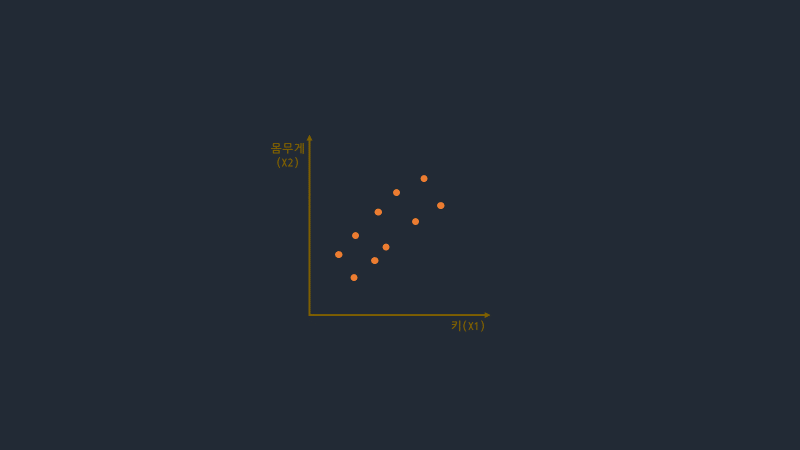

키와 몸무게 2개의 피처를 가지고 이쓴ㄴ 데이터 세트가 다음과 같이 구성이 되어있음  
이 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소를 할 수 있음

A. 데이터 변동성이 가장 큰 방향으로 축 생성

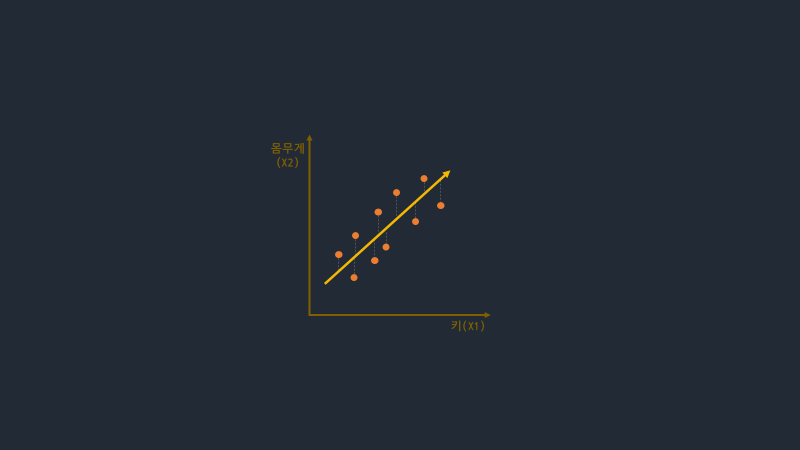

B. 새로운 축 으로 데이터 투영

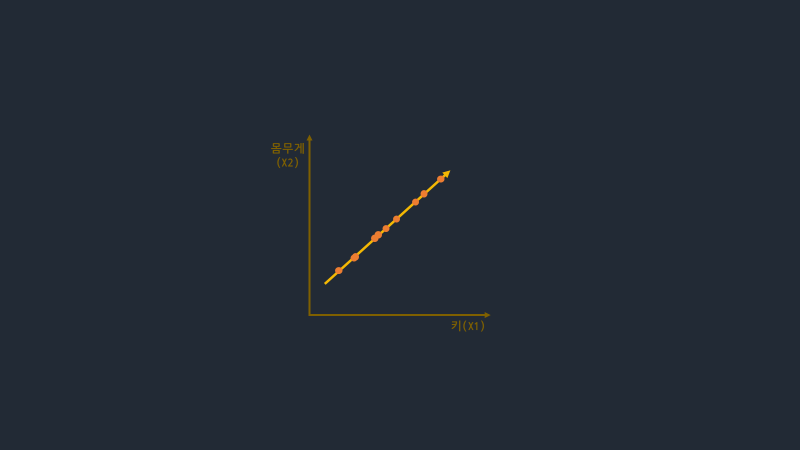

C. 새로운 축 기준으로 데이터 표현

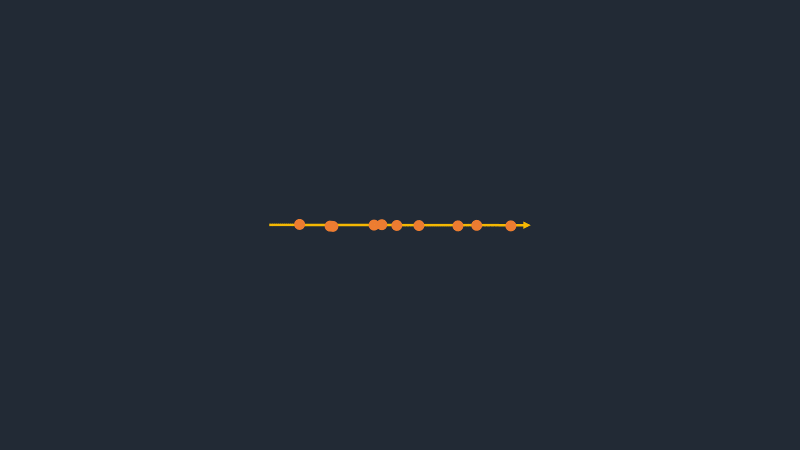

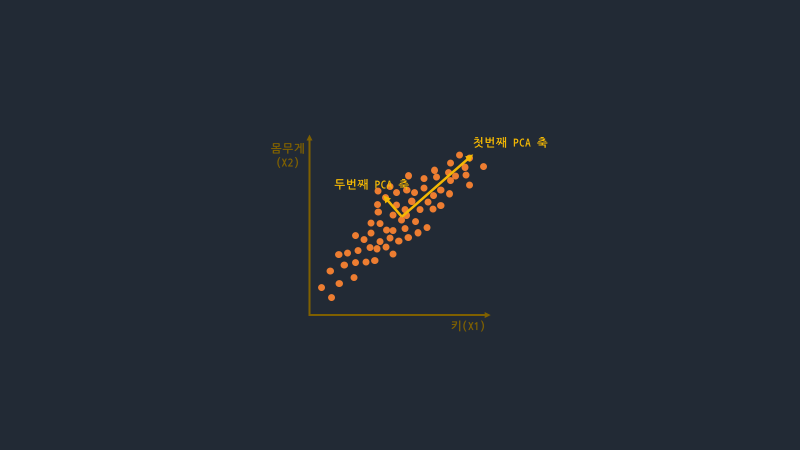

PCA는 제일 먼저 가장 큰 데이터 변동성을 기반으로 첫번째 벡터 축을 생성하고, 두 번째 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 함.  
세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성  
이렇게 하여 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수 만큼의 차원으로 원본 데이터가 차원 축소 됨.  

주성분 분석은 **원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법**이다.  

선형대수 관점에서 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형변환하는 것이다.  
- 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
- 고유값은 바로 이 고유벡터의 크기를 나타내며 동시에 입력 데이터의 분산을 나타냄

## 선형변환
일반적으로 선형변환은 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미함.  
이를 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념으로도 볼 수 있고, 이 경우 이 행렬을 바로 공간으로 가정하는 것

보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미함.  
공분산은 두 변수 간의 변동을 의미함
- 즉 사람 키 변수를 X,  몸무게 변수 Y라고 하면 공분산 Cov(X,Y) > 0은 X(키)가 증가할 때 Y(몸무게)도 증가한다는 의미
- 공분산 행렬은 여러 변수와 관련되 공분산을 포함하는 정방형 행렬이다.

|||||
|--|--|--|--|
||X|Y|Z|
|X|**3.0**|-0.71|-0.24|
|Y|-0.71|**4.5**|0.28|
|Z|-0.24|0.28|**0.91**|

공분산 행렬에서 대각 원소는 각 변수(X, Y, Z)의 분산을 의미하며, 이외의 원소는 가능한 모든 변수 쌍 간의 공분산을 의미  
X, Y, Z의 분산은 각각 3.0, 4.5, 0.91이다.  
X와 Y의 공분산은 -0.71, X와 Z의 공분산은 -0.24, Y와 Z의 공분산은 0.28이다.

- 고유벡터는 행렬 A를 곱하더라도 방향은 변하지 않고 그 크기만 변하는 벡터를 지칭함  

즉 Ax = ax(A는 행렬, x는 고유벡터, a는 스칼라값)  
이 고유벡터는 여러 개가 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있음  

- 2x2 행렬은 두 개의 고유벡터를, 3x3 행렬은 3개의 고유벡터를 가질 수 있음  

이렇게 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는데 사용

공분산행렬은 정방행렬이며 대칭행렬이다.  
- 정방행렬은 열과 행이 같은 행렬을 지칭
- 대칭행렬은 대각 원소를 중심으로 원소 값이 대칭되는 행렬
  - 즉 $A^T\;=\;A$인 행렬
공분한행렬은 개별 분산값을 대각 원소로 하는 대칭행렬이다.  
이 대칭행렬은 고유값 분해와 관련해 매우 좋은 특성이 있음  
대칭 행렬은 항상 고유벡터를 직교행렬로 고유 값을 정방 행려로 대각화 할 수 있다는 것  

입력 데이터의 공분산 행렬을 C라고 하면 공분산 행렬의 특성으로 인해 다음과 같이 분해 할 수 있음
$$C\;=\;P\sum{P^T}$$
- 이때 P는 $n\;×\;n$의 직교행렬이며, $Σ$는 $n\;×\;n$ 정방행렬, $P^T$는 행렬 P의 전치 행렬이다.

위 식은 고유벡터 행렬과 고유값 행렬로 다음과 같이 대응된다.
$$C=\left [ e_1\cdots e_n \right ]\begin{bmatrix}\lambda_1&\cdots&0\\
\cdots&\cdots&\cdots\\
0&\cdots&\lambda_n\\
\end{bmatrix}\begin{bmatrix}
e_1^t\\\cdots\\e_n^t
\end{bmatrix}$$

즉 공분산 C는 고유벡터 직교행렬 * 고유값 정방행렬 * 고유벡터 직교 행렬의 전치 행렬로 분해 된다.  
$e_i$는 $i$번째 고유벡터를, $\lambda_i$는 $i$번째 고유벡터의 크기를 의미함.  
$e_1$는 가장 분산이 큰 방향을 가진 고유벡터이며, $e_2$는 $e_1$의 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터이다. 


## Step
1. 입력 데이터 세트의 공분산 행렬을 생성함
2. 공분산 행렬의 고유벡터와 고유값을 계산함
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

**입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA이다**

**PCA는 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것**

## 코드 구현

붓꽃(Iris)데이터 세트를 이용해 구현  
데이터 세트
- sepal length
- sepal width
- petal length
- petal width

4개의 속성을 2개의 주성분으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인

In [ ]:
#라이브러리 로드
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#데이터 로드
iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF["target"] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
def get_scatter_plt(df, column_names):
  #setosa = 세모, versicolor = 네모, virginica = 동그라미로 표현
  markers = ['^','s','o']

  for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i][column_names[0]]
    y_axis_data = df[df['target']==i][column_names[1]]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

  plt.legend()
  plt.xlabel(column_names[0])
  plt.ylabel(column_names[1])
  plt.show()

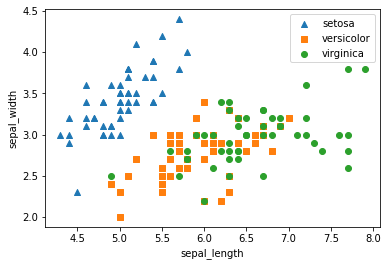

In [ ]:
#데이터 시각화(sepal length, sepal width)
#setosa = 세모, versicolor = 네모, virginica = 동그라미로 표현
markers = ['^','s','o']
column_names = ['sepal_length','sepal_width']
get_scatter_plt(irisDF,column_names)

Setosa 품종의 경우 sepal_width >= 3.0, sepal_length <= 6.0 인 곳에 일정하게 분포가 되어있음  
Versicolor, Virginica의 경우에는 sepal_width, sepal_length 조건만으로는 분류가 어려운 복잡한 조건이다.  

PCA로 4개 속성(sepal_length, sepal_width, petal_length, petal_width)2개의  
주성분으로 압축한 뒤 앞의 예제와 비슷하게 2개의 PCA속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화하겠음

**PCA를 적용하기 전에 개별 속성을 함께 스케일링을 해야함**
- PCA는 여러 속성의 값을 연산해야 하기 때문에 속성의 스케일에 영향을 받음
- StandardScaler를 이용해 평균이 0 분산이 1인 표준 정규 분포로 동일하게 스케일을 변환


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(irisDF)

스케일링이 적용된 데이터 세트에 PCA를 적용하겠음
- 4차원 -> 2차원(주성분)

In [ ]:
from sklearn.decomposition import PCA
#PCA 클래스는 생성 파라미터로 n_components를 입력받는데 변환할 차원(주성분)을 의미함
components = 2
pca = PCA(n_components=components)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


pca 데이터세트의 크기를 확인해 보니 2개의 차원을 가지는 것을 확인할 수 있음  
해당 데이터세트는 넘파이 행렬에서 DataFrame으로 변환해서 데이터 값을 확인하겠음

In [ ]:
pca_columns = ["pca_component_1", "pca_component_2"]
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


이제 2개의 속성으로 2차원상에서 시각화를 진행

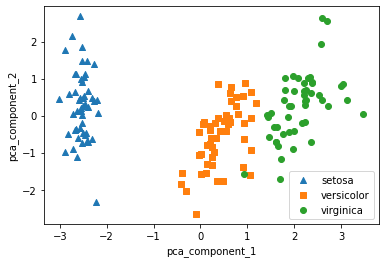

In [ ]:
get_scatter_plt(irisDF_pca,pca_columns)

PCA 변환된 데이터 세트가 원본보다 더 명확하게 분리돼 있음  
PCA로 변환 후에는 마치 군집화를 적용한 것이 품종별로 pca_component_1값을 기준으로 비교적 명확하게 구분이 가능함  
- 이는 pca_component_1이 원본 데이터의 변동성을 매우 잘 반영했기 때문

pca 객체의 explained_variance_ratio_속성으로 전체 변동성에서 주성분이 차지하는 변동성 비율을 확인해 보겠음

In [ ]:
print("변동성 비율 : ", pca.explained_variance_ratio_)

변동성 비율 :  [0.76740358 0.18282727]


첫번째 주성분이 76.8%, 두번째 주성분이 18.4% 차지하는 것을 확인할 수 있음  
2개의 요소 만으로 원본 데이터의 변동성을 95% 설명할 수 있음 

랜덤포레스트 모델로 원본 데이터와 pca로 변환한 데이터를 각각 분류를 적용한뒤에 결과를 비교하겠음
- cross_val_score()로 3개의 교차 검증 세트의 정확도 결과를 비교

In [ ]:
#원본데이터
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=156)
scores = cross_val_score(rfc, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)

[0.98 0.94 0.96]


In [ ]:
#PCA 데이터
X = irisDF_pca.drop('target', axis=1)
y = irisDF_pca['target']

rfc = RandomForestClassifier(random_state=156)
scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=3)
print(scores)

[0.98 0.98 1.  ]


PCA데이터가 원본데이터보다 일부 검증 세트에서는 더 나은 정확도를 나타내고있음.  
물론 이렇게 PCA로 변환된 데이터 세트가 원본 데이터 세트보다 더 나은 예측 정확도를 나타내는 경우는 흔하지않음    
대부분은 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없음  
**고차원 데이터를 저차원으로 변환하면 직관적으로 이해하기도 편하며, 데이터의 주축을 이루는 속성이 어떤 것인지 쉽게 파악할 수 있음**

## 코드구현2
- [(Credit Card Clients Data Set)UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

In [ ]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 4.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
df_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_credit_card/credit_card.xlsx"
df =pd.read_excel(df_path,sheet_name='Data')
print(df.shape)

(30000, 25)


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


현재 데이터의 컬럼명을 변경하겠음
- PAY_0 : PAY_1
- (target)default payment next month : defalut

In [ ]:
map = {
    "PAY_0" : "PAY_1",
    "default payment next month" : "defalut"
}
df = df.rename(columns = map)

불필요한 ID 컬럼 제거

In [ ]:
df = df.drop("ID", axis=1)

타겟데이터와 훈련데이터를 분리

In [ ]:
X = df.drop("defalut", axis=1)
y = df['defalut']

print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


훈련데이터의 각 피처별 상관관계를 시각화

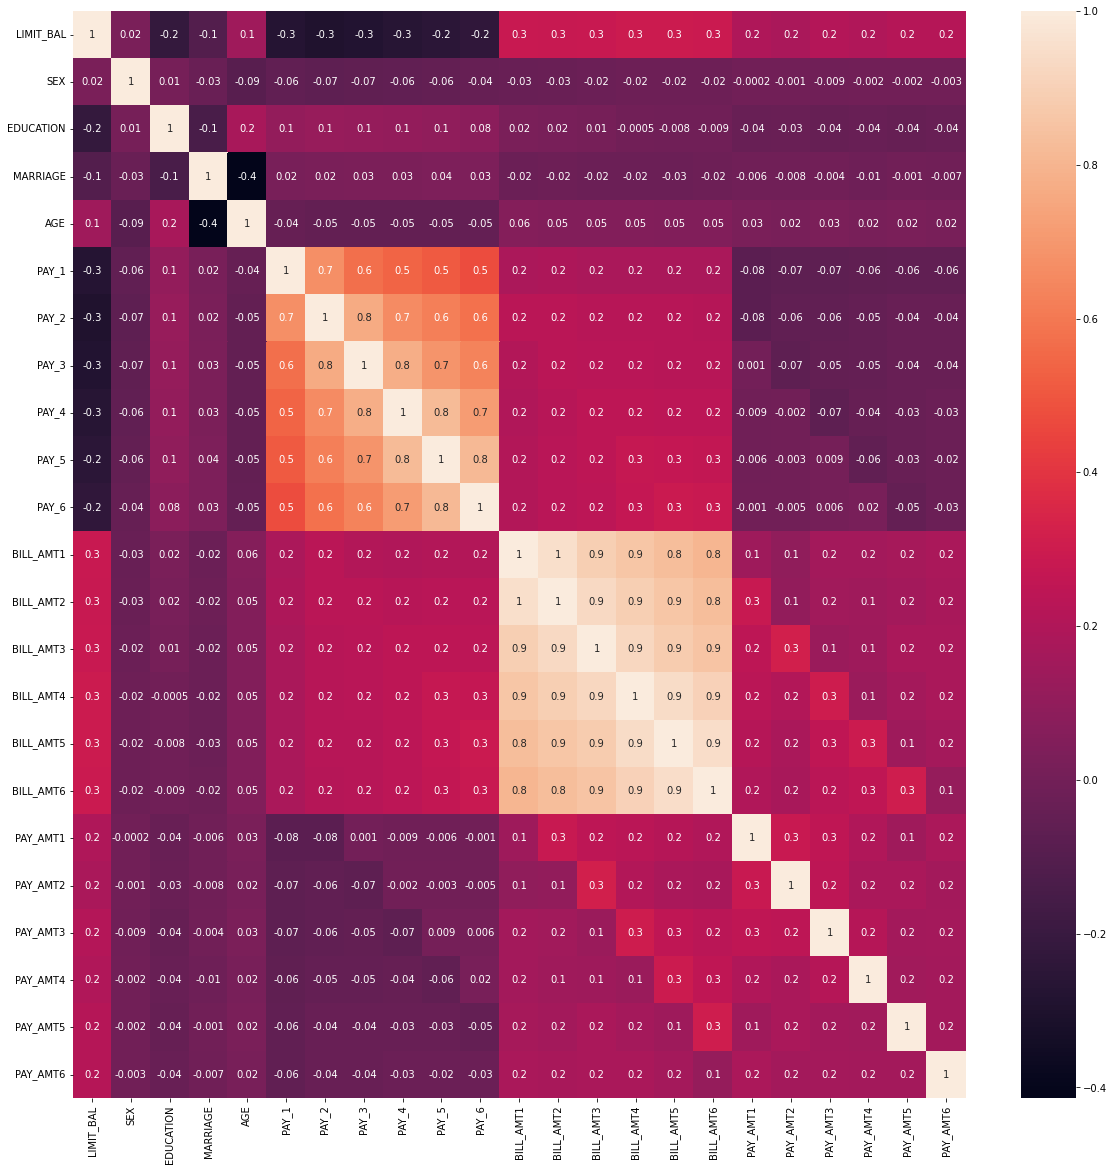

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

상관관계를 확인해보니 BILL_AMT1 ~ BILL_AMT6의 상관계수가 0.9로 매우 높음을 알 수있고,  
PAY_1~PAY_6 역시 상관도가 높습니다.  
BILL_AMT1 ~ 6 칼럼을 PCA로 6개의 칼럼은 2개로 축소한뒤 변동성 비율을 확인해보겠습니다.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ["BILL_AMT{}".format(i) for i in range(1, 7)]
print("cols_bill : ",cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X[cols_bill])
num = 2
pca = PCA(n_components=num)
pca.fit(df_cols_scaled)
print("PCA Componenet별 변동성 : " ,pca.explained_variance_ratio_)

cols_bill :  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Componenet별 변동성 :  [0.90555253 0.0509867 ]


2개의 PCA 컴포넌트만으로 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며,  
특히 첫번째 PCA축으로 90%의 변동성을 수용할 정도로 6개의 상관도가 매우 높음  

원본 데이터와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 비교하겠음

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
def get_accuracy(X, y):
  rfc = RandomForestClassifier(random_state=156)
  scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=3)
  print("CV=3 인 경우 개별 Fold세트별 정확도 : ", scores)
  print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

In [ ]:
#원본데이터
get_accuracy(X, y)

CV=3 인 경우 개별 Fold세트별 정확도 :  [0.8072 0.82   0.8225]
평균 정확도 : 0.8166


In [ ]:
#PCA데이터
#n_component = 6으로 설정
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
num = 6
pca = PCA(n_components=num)
X = pca.fit_transform(X)
print("PCA Componenet별 변동성 : " ,pca.explained_variance_ratio_)
print("PCA 총 변동성 : ", sum(pca.explained_variance_ratio_))
get_accuracy(X, y)

PCA Componenet별 변동성 :  [0.28448215 0.17818817 0.06743303 0.06401153 0.04457514 0.04161671]
PCA 총 변동성 :  0.6803067288855129
CV=3 인 경우 개별 Fold세트별 정확도 :  [0.7913 0.798  0.8   ]
평균 정확도 : 0.7964


6개 PCA 컴포넌트는 68%를 설명하 수 있으며, 전체 데이터를 기반으로 한 예측 결과보다 1 ~ 2%정도 성능 저하만 발생했습니다.  
1 ~ 2% 성능이 미비한 성능저하로 보기는 힘들지만, 전체 속성의 1/4정도만으로도  
이정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것입니다.  

**PCA는 차원축소를 통해 데이터를 쉽게 인지하는데 활용할 수 있지만,**   
**이보다 더 활발하게 적용되는 영역은 컴퓨터 비전(Computer Vision) 분야이다.**  

**특히 얼굴 인식의 경우 Eigen-face라고 불리는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용하는 경우가 많음**
